# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 642


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city +"&appid="+ weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["temp_max"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | dingle
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | myitkyina
Processing Record 11 of Set 1 | korla
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | bathsheba
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | ostrovnoy
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | vitim
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | nizhneyansk


Processing Record 35 of Set 4 | san patricio
Processing Record 36 of Set 4 | naryan-mar
Processing Record 37 of Set 4 | portland
Processing Record 38 of Set 4 | monterey
Processing Record 39 of Set 4 | hasaki
Processing Record 40 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 41 of Set 4 | thompson
Processing Record 42 of Set 4 | kondopoga
Processing Record 43 of Set 4 | flinders
Processing Record 44 of Set 4 | poli
Processing Record 45 of Set 4 | mulanje
Processing Record 46 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 47 of Set 4 | mangrol
Processing Record 48 of Set 4 | soe
Processing Record 49 of Set 4 | salalah
Processing Record 0 of Set 5 | te anau
Processing Record 1 of Set 5 | bhatkal
Processing Record 2 of Set 5 | huilong
Processing Record 3 of Set 5 | rumphi
Processing Record 4 of Set 5 | cordoba
Processing Record 5 of Set 5 | monatele
City not found. Skipping...
Processing Record 6 of Set 5 | martinsicuro
Processing Record 7 of Set 5 

Processing Record 23 of Set 8 | komsomolskiy
Processing Record 24 of Set 8 | luanda
Processing Record 25 of Set 8 | guerrero negro
Processing Record 26 of Set 8 | alotau
City not found. Skipping...
Processing Record 27 of Set 8 | coquimbo
Processing Record 28 of Set 8 | grafton
Processing Record 29 of Set 8 | coihaique
Processing Record 30 of Set 8 | caldas novas
Processing Record 31 of Set 8 | san carlos
Processing Record 32 of Set 8 | sabang
Processing Record 33 of Set 8 | biak
Processing Record 34 of Set 8 | yaring
Processing Record 35 of Set 8 | praia da vitoria
Processing Record 36 of Set 8 | mitsamiouli
Processing Record 37 of Set 8 | mnogovershinnyy
Processing Record 38 of Set 8 | thornbury
Processing Record 39 of Set 8 | samusu
City not found. Skipping...
Processing Record 40 of Set 8 | parintins
Processing Record 41 of Set 8 | churapcha
Processing Record 42 of Set 8 | los llanos de aridane
Processing Record 43 of Set 8 | qaqortoq
Processing Record 44 of Set 8 | kinkala
Process

Processing Record 9 of Set 12 | oksfjord
Processing Record 10 of Set 12 | dudinka
Processing Record 11 of Set 12 | ternate
Processing Record 12 of Set 12 | huichapan
Processing Record 13 of Set 12 | vrangel
Processing Record 14 of Set 12 | mushie
Processing Record 15 of Set 12 | corpus christi
Processing Record 16 of Set 12 | mus
Processing Record 17 of Set 12 | kefamenanu
Processing Record 18 of Set 12 | asau
Processing Record 19 of Set 12 | san policarpo
Processing Record 20 of Set 12 | vozhega
Processing Record 21 of Set 12 | akyab
Processing Record 22 of Set 12 | luderitz
Processing Record 23 of Set 12 | kirakira
Processing Record 24 of Set 12 | najran
Processing Record 25 of Set 12 | passo fundo
Processing Record 26 of Set 12 | cervo
Processing Record 27 of Set 12 | yar-sale
Processing Record 28 of Set 12 | opole
Processing Record 29 of Set 12 | nisia floresta
Processing Record 30 of Set 12 | polunochnoye
Processing Record 31 of Set 12 | kokkola
Processing Record 32 of Set 12 | ak

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,2.49,2.49,0,5.66,US,1675737524
1,georgetown,5.4112,100.3354,27.96,27.96,20,1.03,MY,1675737303
2,dingle,10.9995,122.6711,27.99,27.99,97,5.88,PH,1675737524
3,lebu,-37.6167,-73.6500,14.25,14.25,0,7.99,CL,1675737524
4,souillac,-20.5167,57.5167,26.21,26.21,40,4.12,MU,1675737525


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,2.49,2.49,0,5.66,US,1675737524
1,georgetown,5.4112,100.3354,27.96,27.96,20,1.03,MY,1675737303
2,dingle,10.9995,122.6711,27.99,27.99,97,5.88,PH,1675737524
3,lebu,-37.6167,-73.6500,14.25,14.25,0,7.99,CL,1675737524
4,souillac,-20.5167,57.5167,26.21,26.21,40,4.12,MU,1675737525


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

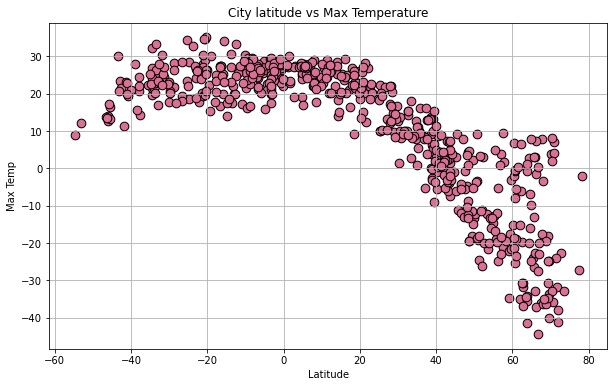

In [9]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black",color="#DB7093",s=75)


# Incorporate the other graph properties
ax.set(xlabel="Latitude",
        ylabel="Max Temp",
        title="City latitude vs Max Temperature")    
ax.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

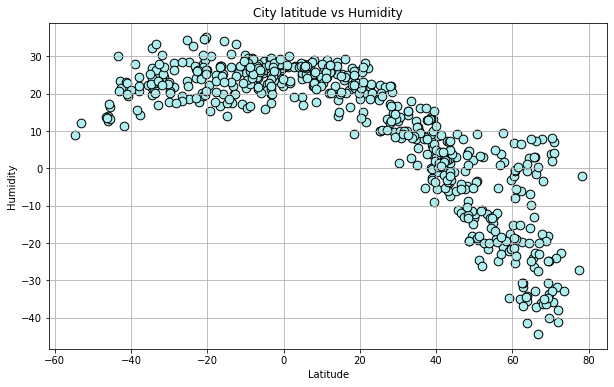

In [10]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor="black",color="#AFEEEE",s=75)

# Incorporate the other graph properties
ax.set(title = "City latitude vs Humidity",
       xlabel="Latitude",
       ylabel="Humidity")
ax.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

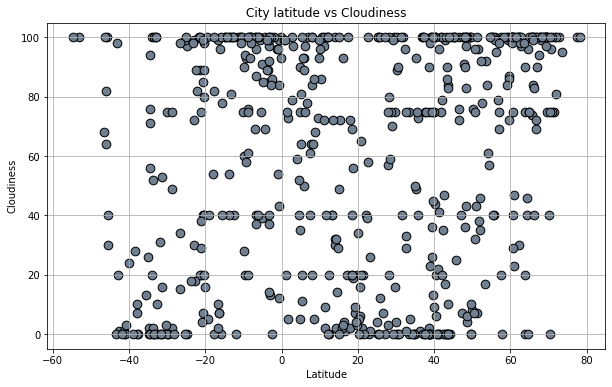

In [11]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolor="black",color="#708090",s=75)

# Incorporate the other graph properties
ax.set(title ="City latitude vs Cloudiness",
        xlabel= "Latitude",
        ylabel= "Cloudiness")

ax.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

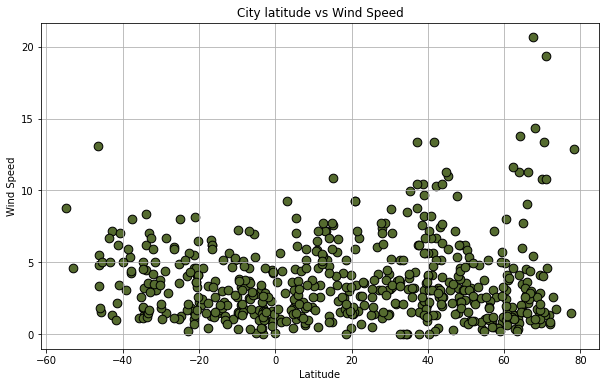

In [12]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolor="black",color="#556B2F",s=75)

# Incorporate the other graph properties
ax.set(xlabel="Latitude",
        ylabel="Wind Speed",
        title="City latitude vs Wind Speed")
ax.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
#Latitude Vs. Temperature
def lin_regress(x,y,x_label,y_label,loc):
    p_slope,p_int, p_r,p_p,p_std_err = linregress(x,y)
    print(f"the r value is {round (p_r,2)}")
    p_fit=p_slope * x + p_int
    line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))
    fig,ax = plt.subplots(figsize= (10,8))
    ax.scatter(x,y,edgecolor="black",facecolor="#DCDCDC",s=75)
    ax.plot(x,p_fit)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.annotate(line_eq,(0,0),fontsize=15,color="red")
    ax.grid
    plt.show()

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,2.49,2.49,0,5.66,US,1675737524
1,georgetown,5.4112,100.3354,27.96,27.96,20,1.03,MY,1675737303
2,dingle,10.9995,122.6711,27.99,27.99,97,5.88,PH,1675737524
5,yellowknife,62.4560,-114.3525,-19.71,-19.71,100,4.63,CA,1675737525
6,albany,42.6001,-73.9662,-1.91,-1.91,47,0.45,US,1675737425


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,lebu,-37.6167,-73.6500,14.25,14.25,0,7.99,CL,1675737524
4,souillac,-20.5167,57.5167,26.21,26.21,40,4.12,MU,1675737525
7,hobart,-42.8794,147.3294,23.36,23.36,20,7.20,AU,1675737311
11,mataura,-46.1927,168.8643,13.89,13.89,82,4.78,NZ,1675737265
13,rikitea,-23.1203,-134.9692,26.51,26.51,30,4.04,PF,1675737527


###  Temperature vs. Latitude Linear Regression Plot

the r value is -0.87


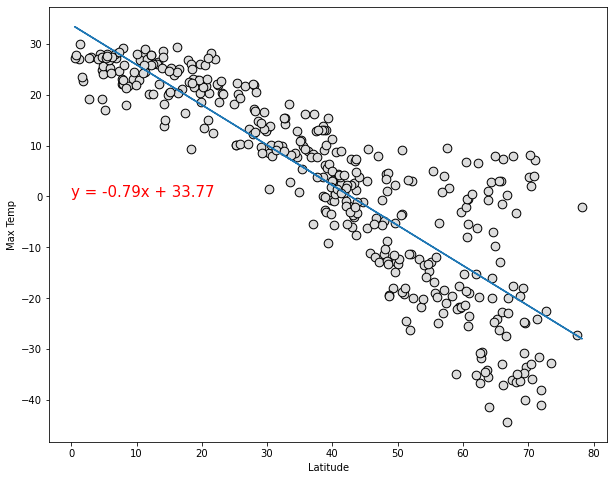

In [53]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp",(10,-30))

the r value is 0.34


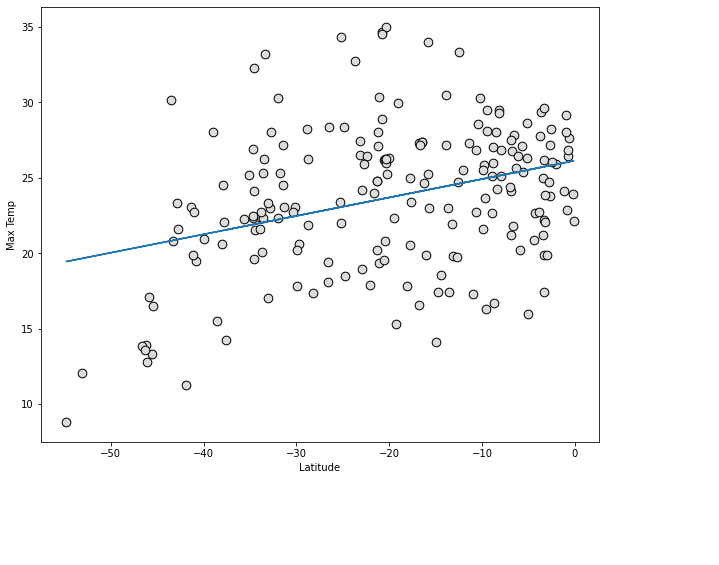

In [54]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp",(-50,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

the r value is -0.87


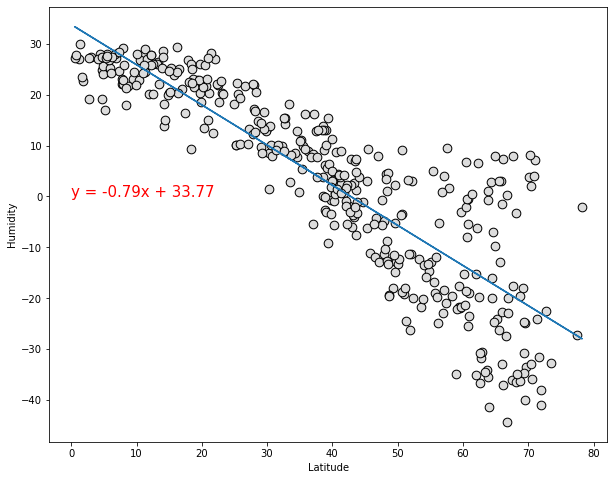

In [55]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity",(10,-30))

the r value is 0.34


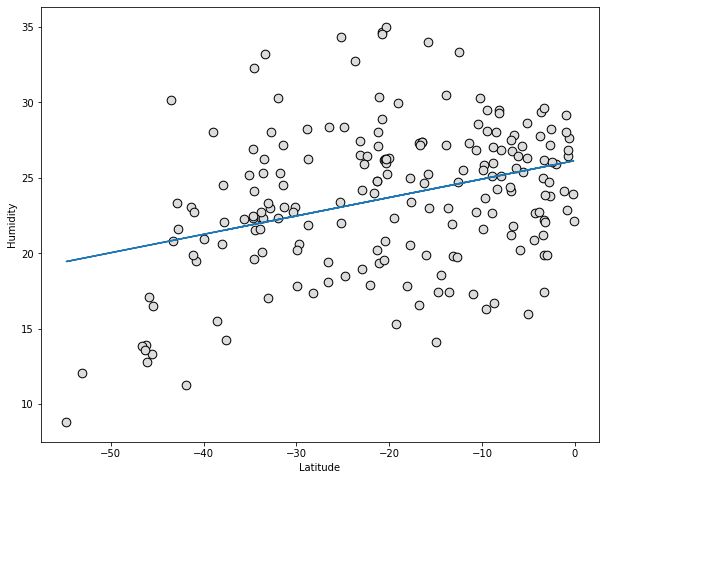

In [56]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity",(-50,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

the r value is 0.28


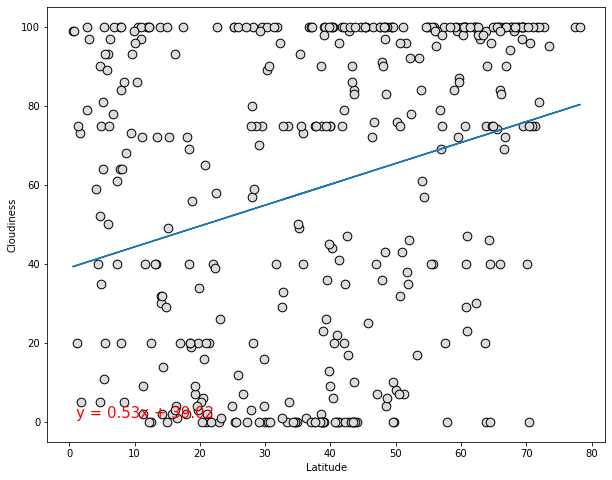

In [35]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness",(10,-30))

the r value is 0.4


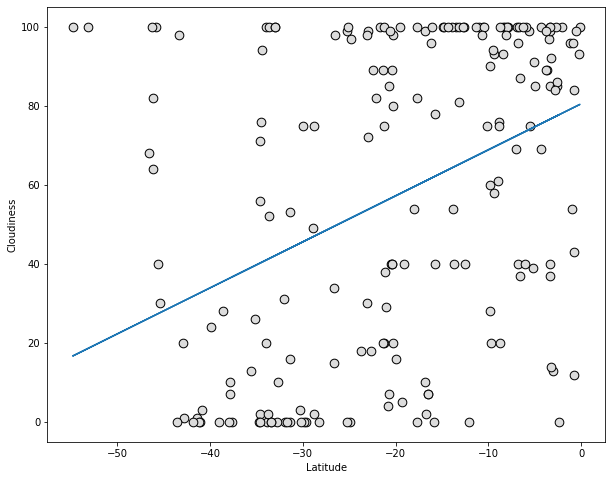

In [27]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness",(-50,90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

the r value is 0.03


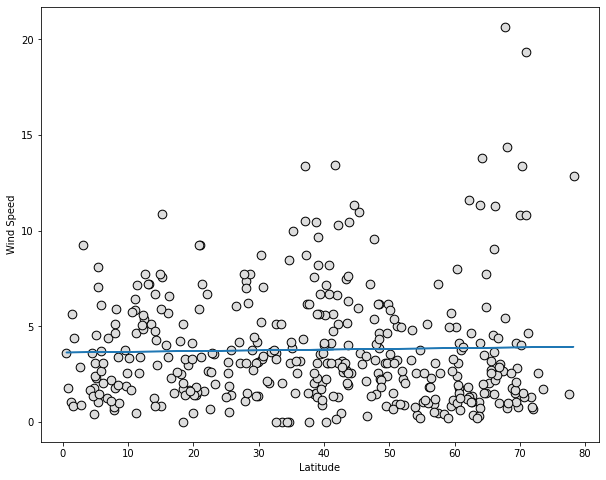

In [25]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed",(10,-15))

the r value is -0.35


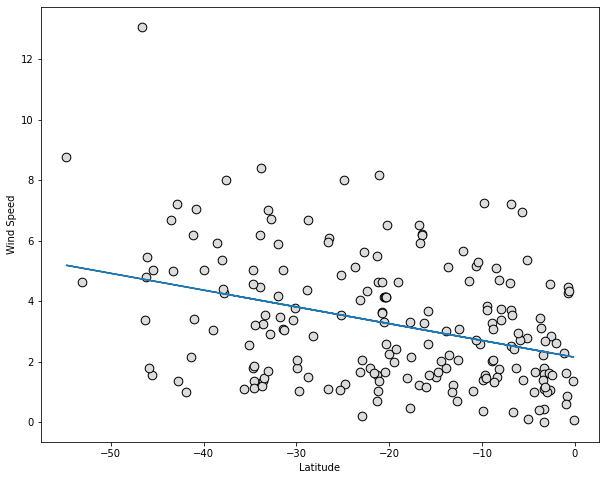

In [26]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed",(10,15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE